In [19]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

Zadanie 1

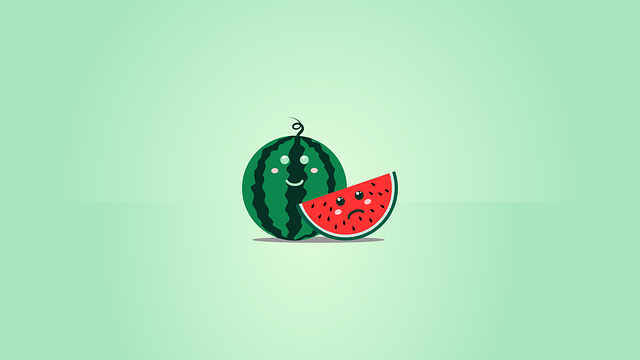

In [20]:
obraz = Image.open('obraz.png')
inicjaly = Image.open('inicjaly.bmp')

obrazk = obraz.copy()
obrazk

![zdjęcie pierwsze](obraz.png)

![zdjęcie_drugie](inicjaly.bmp)

Zadanie 2 a

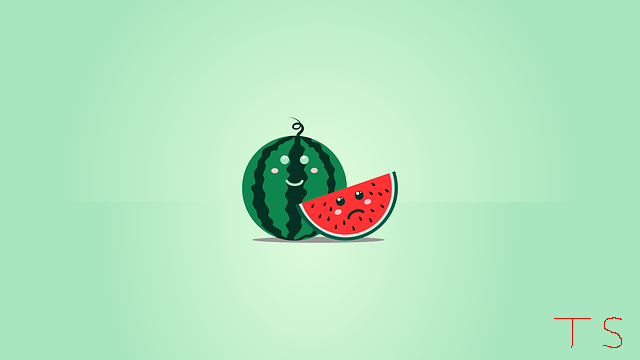

In [21]:
def wstaw_inicjaly(obraz, inicjaly, m, n, kolor):
    width, height = inicjaly.size
    for i in range(width):
        for j in range(height):
            if inicjaly.getpixel((i, j)) == 0:  # Czarny piksel w inicjałach
                obraz.putpixel((m + i, n + j), kolor)
    return obraz

# Pozycjonuję w prawym dolnym rogu
m = obrazk.width - inicjaly.width
n = obrazk.height - inicjaly.height
kolor = (255,0,0) #RGB czerwony

obraz1 = wstaw_inicjaly(obrazk.copy(), inicjaly, m, n, kolor)
obraz1

![zdjęcie trzecie](obraz1.png)

Zadanie 2 b

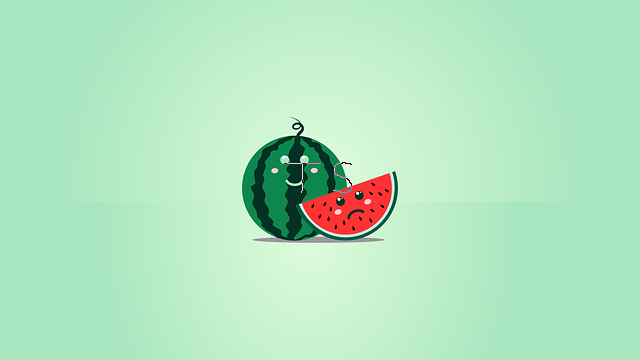

In [22]:
def wstaw_inicjaly_maska(obraz, inicjaly, m, n):
    width, height = inicjaly.size
    for i in range(width):
        for j in range(height):
            if inicjaly.getpixel((i, j)) == 0:  # Czarny piksel w inicjałach
                r, g, b = obraz.getpixel((m + i, n + j))
                obraz.putpixel((m + i, n + j), (255 - r, 255 - g, 255 - b))  # Negatyw
    return obraz

m2 = (obrazk.width - inicjaly.width) // 2
n2 = (obrazk.height - inicjaly.height) // 2

obraz2 = wstaw_inicjaly_maska(obrazk.copy(), inicjaly,m2, n2)
obraz2

![zdjęcie czwarte](obraz2.png)

Zadanie 3

In [23]:
def wstaw_inicjaly_load(obraz, inicjaly, m, n, kolor):
    pix = obraz.load()
    ini_pix = inicjaly.load()
    for i in range(inicjaly.width):
        for j in range(inicjaly.height):
            if ini_pix[i, j] == 0:  # Czarny piksel
                pix[m + i, n + j] = kolor
    return obraz

def wstaw_inicjaly_maska_load(obraz, inicjaly, m, n):
    pix = obraz.load()
    ini_pix = inicjaly.load()
    for i in range(inicjaly.width):
        for j in range(inicjaly.height):
            if ini_pix[i, j] == 0:  # Czarny piksel
                r, g, b = pix[m + i, n + j]
                pix[m + i, n + j] = (255 - r, 255 - g, 255 - b)  # Negatyw
    return obraz


def plot_zad3_results(original, images, titles, filename):
    fig, axes = plt.subplots(1, len(images) + 1, figsize=(20, 10))

    # Oryginalny obraz
    axes[0].imshow(original, cmap="gray")
    axes[0].set_title("Oryginalny obraz")
    axes[0].axis("off")

    # Przetworzone obrazy
    for i, (img, title) in enumerate(zip(images, titles)):
        axes[i + 1].imshow(img, cmap="gray")
        axes[i + 1].set_title(title)
        axes[i + 1].axis("off")

    plt.tight_layout()
    plt.savefig(filename)
    plt.close()


# Przygotowanie danych do wykresu
# Obrazy przetworzone metodami getpixel/putpixel i load
obraz_getpixel = wstaw_inicjaly(obrazk.copy(), inicjaly, m, n, kolor)
obraz_getpixel_maska = wstaw_inicjaly_maska(obrazk.copy(), inicjaly, m, n)

obraz_load = wstaw_inicjaly_load(obrazk.copy(), inicjaly, m, n, kolor)
obraz_load_maska = wstaw_inicjaly_maska_load(obrazk.copy(), inicjaly, m, n)

# Lista obrazów i tytułów
images_task3 = [obraz_getpixel, obraz_getpixel_maska, obraz_load, obraz_load_maska]
titles_task3 = [
    "Metoda getpixel/putpixel (kolor)",
    "Metoda getpixel/putpixel (maska)",
    "Metoda load (kolor)",
    "Metoda load (maska)",
]

# Rysowanie wykresu
plot_zad3_results(obrazk, images_task3, titles_task3, "fig1.png")

![zdjęcie piąte](fig1.png)

Zadanie 4

In [24]:
def kontrast(obraz, wsp_kontrastu):
    mn = ((255 + wsp_kontrastu) / 255) ** 2
    return obraz.point(lambda i: 128 + (i - 128) * mn)


def transformacja_logarytmiczna(obraz):
    return obraz.point(lambda i: 255 * np.log(1 + i / 255))

def transformacja_gamma(obraz, gamma):
    return obraz.point(lambda i: (i / 255) ** (1 / gamma) * 255)

def plot_contrast_results(original, contrasts, wspolczynniki, filename):
    fig, axes = plt.subplots(1, len(contrasts) + 1, figsize=(20, 10))

    # Oryginalny obraz
    axes[0].imshow(original, cmap="gray")
    axes[0].set_title("Oryginalny obraz")
    axes[0].axis("off")

    # Obrazy po transformacji kontrastu
    for i, (contrast_image, wsp) in enumerate(zip(contrasts, wspolczynniki)):
        axes[i + 1].imshow(contrast_image, cmap="gray")
        axes[i + 1].set_title(f"Kontrast: {wsp}")
        axes[i + 1].axis("off")

    plt.tight_layout()
    plt.savefig(filename)
    plt.close()

contrasts = [10, 50, 100]
contrasted_images = [kontrast(obrazk.copy(), c) for c in contrasts]
plot_contrast_results(obrazk, contrasted_images, contrasts, "fig2.png")

def plot_log_results(original, log_image, linear_image, filename):
    fig, axes = plt.subplots(1, 3, figsize=(20, 10))

    # Oryginalny obraz
    axes[0].imshow(original, cmap="gray")
    axes[0].set_title("Oryginalny obraz")
    axes[0].axis("off")

    # Obraz po transformacji logarytmicznej
    axes[1].imshow(log_image, cmap="gray")
    axes[1].set_title("Transformacja logarytmiczna")
    axes[1].axis("off")

    # Obraz po filtrze liniowym
    axes[2].imshow(linear_image, cmap="gray")
    axes[2].set_title("Filtr liniowy (a=2, b=100)")
    axes[2].axis("off")

    plt.tight_layout()
    plt.savefig(filename)
    plt.close()


log_transformed = transformacja_logarytmiczna(obrazk.copy())
linear_transformed = obrazk.point(lambda i: i * 2 + 100)

plot_log_results(obrazk, log_transformed, linear_transformed, "fig3.png")

def plot_gamma_results(original, gammas, gamma_images, filename):
    fig, axes = plt.subplots(1, len(gamma_images) + 1, figsize=(20, 10))

    # Oryginalny obraz
    axes[0].imshow(original, cmap="gray")
    axes[0].set_title("Oryginalny obraz")
    axes[0].axis("off")

    # Obrazy po transformacji gamma
    for i, (gamma_image, gamma) in enumerate(zip(gamma_images, gammas)):
        axes[i + 1].imshow(gamma_image, cmap="gray")
        axes[i + 1].set_title(f"Gamma: {gamma}")
        axes[i + 1].axis("off")

    plt.tight_layout()
    plt.savefig(filename)
    plt.close()

gammas = [0.5, 2, 5]
gamma_images = [transformacja_gamma(obrazk.copy(), g) for g in gammas]

plot_gamma_results(obrazk, gammas, gamma_images, "fig4.png")


![zdjęcie szóste](fig2.png)

![zdjęcie_siódme](fig3.png)

![zdjęcie_ósme](fig4.png)

Zadanie 5 a

Różnice między np.array a point:
    - Operacje na np.array zmieniają wartości w miejscu (dodają +100), powodując przepełnienie dla wartości >255.
    - point automatycznie obsługuje zakres wartości i stosuje modyfikację w granicach 0-255.

Zadanie 5 b

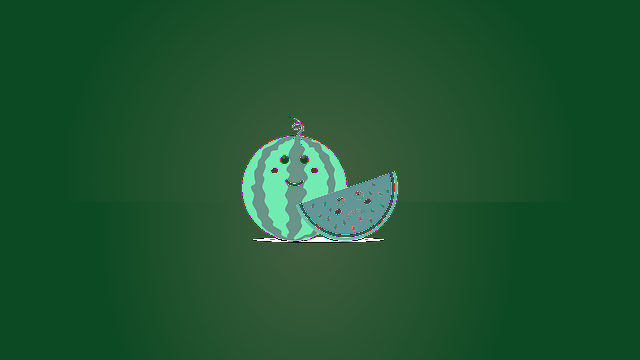

In [25]:
def point_equivalent(obraz, value):
    T = np.array(obraz, dtype=np.uint8)
    T = np.clip(T + value, 0, 255)
    return Image.fromarray(T, mode=obraz.mode)

transformed_image = point_equivalent(obrazk.copy(), 100)

transformed_image